# Análise conclusiva de subnotificações de SRAG provocada por Covid-19 no Brasil

## Integrantes do grupo
 - Daniel Fernandes Pinho (EF02634 - Florestal)
 - Mateus Pinto da Silva (EF03489 - Florestal)
 - Milena Nobres (ER05164 - Rio Paranaíba)

**Observacao:** Para a correta execução deste notebook, é necessário ter baixado e processado os dados utilizando os scripts **download_raw_data.py** e **process_data.py**, ou ter baixado os dados já processados através do link https://drive.google.com/file/d/1knTUgLZHLQcBF9CmCdHWk-WP94AXh2_J/view?usp=sharing e colocado o arquivo .parquet descompactado na pasta raiz_repositorio/data/processed.

## Decisões desta etapa
Optamos por dividir os casos em 3 conjuntos: casos confirmados de covid, casos seguramente não-covid, e casos possíveis de subnotificação, chamados de casos desconhecidos no código para simplificação. O primeiro grupo engloba todos os casos de diagnóstico positivo para a Covid-19. O segundo grupo, casos anteriores ao primeiro dia de pandemia. Já o terceiro grupo engloba casos que foram posteriores ou no primeiro dia de pacientes não vacinados contra a Covid e que apresentaram diagnóstico negativo à doença.

## Modificações de outras etapas
Ademais, algumas modificações foram feitas. Primeiro, infelizmente não conseguimos utilizar dados de coordenadas geográficos, e o motivo é que o código de cada município do SUS é diferente do IBGE, e não achamos nenhuma tabela que o correlacione com o nome da cidade e muito menos com seu polígono ou coordenada. O código do IBGE é um número natural de 7 dígitos, e o do SUS é um natural de 6. Tentamos bastante, mas não conseguimos correlacionar esses valores. Entretanto, o código por Unidade Federativa do SUS é o mesmo do IBGE, e o utilizamos para fazer algumas análises.

## Dicionário de alguns termos
- SRAG: Síndrome respiratória aguda grave. É um diagnóstico genérico de enfermidade respiratória grave. Pode ter vários causadores, como gripe, alergia forte ou Covid-19.
- Covid-19: É a doença em si causada pelo vírus SARS-COV-2 que provocou iniciou a pandemia em 2020.
- Dia zero da pandemia no Brasil: Foi o dia que acreditam ter acontecido a primeira infecção, através de estudos médicos, embora não se saiba exatamente quem foi nem onde foi. É o dia seis de fevereiro de 2020.

Dadas todas essas considerações, segue este relatório no modelo pergunta/resposta.

In [1]:
from common.path import *
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('figure', figsize=(10, 7))

In [2]:
PANDEMIC_DAY_ZERO = '2020-02-06'

# Baixar e descompactar o arquivo https://drive.google.com/file/d/1knTUgLZHLQcBF9CmCdHWk-WP94AXh2_J/view?usp=sharing
all_cases = pd.read_parquet(PROCESSED_DATA_DIR / 'casos.parquet')
true_covid_cases = all_cases[all_cases.dg_covid == 1]
non_covid_cases = all_cases[(all_cases.cad_dt_notificacao < PANDEMIC_DAY_ZERO)]
unknow_cases = all_cases[(all_cases.dg_covid == 0) & (all_cases.vac_covid == 0) & (all_cases.cad_dt_notificacao >= PANDEMIC_DAY_ZERO)]

all_deaths = all_cases[all_cases.evo_obito==1]
true_covid_deaths = all_deaths[all_deaths.dg_covid == 1]
non_covid_deaths = all_deaths[(all_deaths.cad_dt_notificacao < PANDEMIC_DAY_ZERO)]
unknow_deaths = all_deaths[(all_deaths.dg_covid == 0) & (all_deaths.vac_covid == 0) & (all_deaths.cad_dt_notificacao >= PANDEMIC_DAY_ZERO)]

RISK_FACTORS = [column for column in all_cases.columns.to_list() if ('fr_' in column)]
SYMPTOMS = [column for column in all_cases.columns.to_list() if ('sint_' in column)]

## Houveram aproximadamente quantos casos confirmados e óbitos por SRAG em cada ano?
Nos números de casos observamos que em 2009 houveram aproximadamente 200 mil casos de SRAG. Nos anos de 2020 e 2021, este número cresceu consideravelmente, onde o total de casos de SRAG sem confirmação de COVID-19, ultrapassou a soma de 600 mil. Entre 2010 e 2019 os números de casos de SRAG por ano são consideravelmente inferiores. Nos anos de 2020 e 2021, o número de casos de SRAG com confirmação de COVID-19 ultrapassaram 2,2 milhões de casos.

Entre os anos 2009 e 2019, notou-se que o número de óbitos não ultrapassou 250 mil  por ano. Nos anos de 2020 e 2021, este número cresceu e a soma de ambos os anos se aproximou de 150 mil óbitos. Quando observado as óbitos por SRAG que também foram diagnosticadas com COVID-19, o número ultrapassou 650 mil.

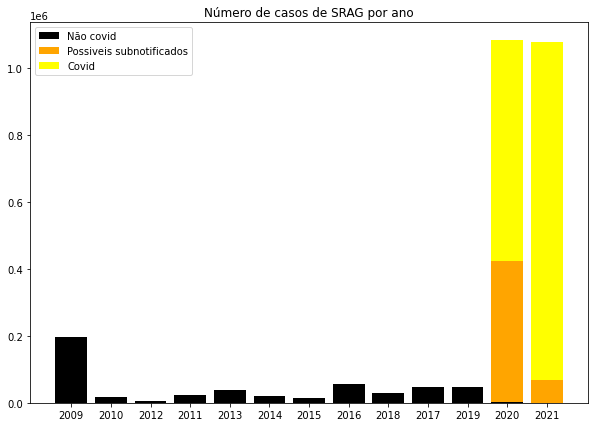

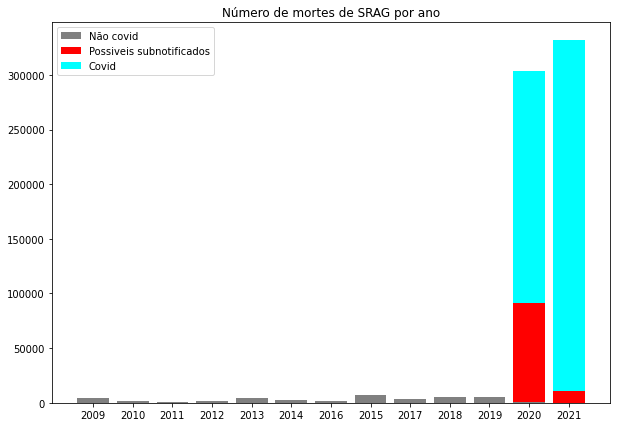

In [3]:
if True:
    x = all_cases.cad_dt_notificacao.dt.strftime('%Y').unique()
    y0 = np.concatenate([non_covid_cases.groupby(non_covid_cases.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy(), [0]])
    y1 = np.concatenate([[0 for _ in range(11)], unknow_cases.groupby(unknow_cases.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()])
    y2 = np.concatenate([[0 for _ in range(11)], true_covid_cases.groupby(true_covid_cases.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()])

    plt.bar(x, y0, color='black', label='Não covid')
    plt.bar(x, y1, bottom=y0, color='orange', label='Possiveis subnotificados')
    plt.bar(x, y2, bottom=y1, color='yellow', label='Covid')

    plt.title("Número de casos de SRAG por ano")
    plt.legend()
    plt.show()

if True:
    x = all_deaths.cad_dt_notificacao.dt.strftime('%Y').unique()
    y0 = np.concatenate([non_covid_deaths.groupby(non_covid_deaths.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy(), [0]])
    y1 = np.concatenate([[0 for _ in range(11)], unknow_deaths.groupby(unknow_deaths.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()])
    y2 = np.concatenate([[0 for _ in range(11)], true_covid_deaths.groupby(true_covid_deaths.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()])

    plt.bar(x, y0, color='grey', label='Não covid')
    plt.bar(x, y1, bottom=y0, color='red', label='Possiveis subnotificados')
    plt.bar(x, y2, bottom=y1, color='cyan', label='Covid')

    plt.title("Número de óbitos de SRAG por ano")
    plt.legend()
    plt.show()

## A idade do paciente com SRAG comparado aos que também foram diagnosticados com COVID-19 mudou?
Sim. Antes da pandemia havia prevalência de casos em crianças e adolescentes, entre 0 e 10 anos. É notável que à medida que a idade aumentava o número de casos diminuía. Após o início da pandemia, o maior número de casos ocorreu nas pessoas de idade entre 50 e 70 anos. Curiosamente, os casos possíveis de subnotificação apresentam distribuição dos dois grupos anteriores somadas, mostrando que podem haver sim casos subnotificados.

Quando às óbitos, existem bastante casos de SRAG pré-pandemia que levaram a óbito crianças de até 10 anos. Porém, isso muda bastante durante a pandemia, já mostrando a natureza da doença Covid-19 (que tende a levar a óbito pessoas idosas, por ser um grupo de risco para a enfermidade), tendo uma baixa frequência de óbitos de crianças até 10 anos. Quanto aos óbitos suspeitos de notificação, eles seguem uma distribuição muito parecida com a de durante a pandemia, mostrando uma boa evidência de que houve subnotificação.

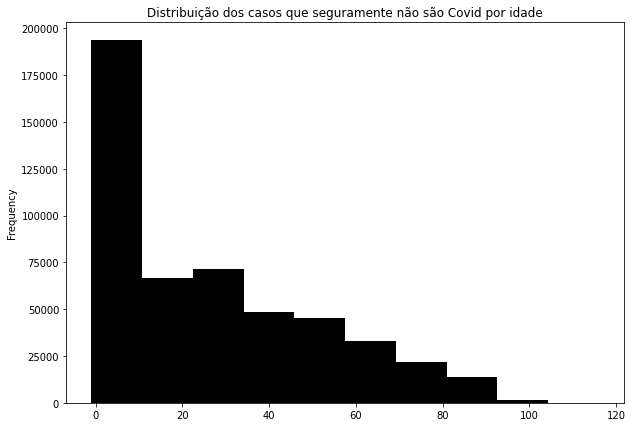

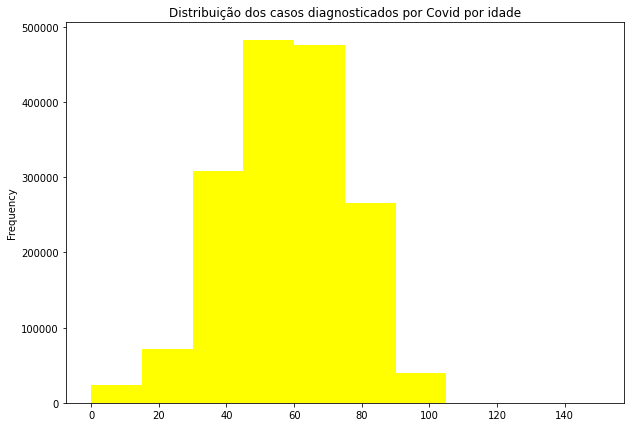

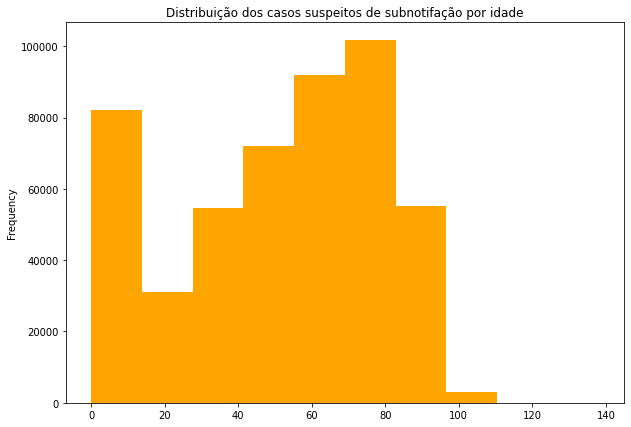

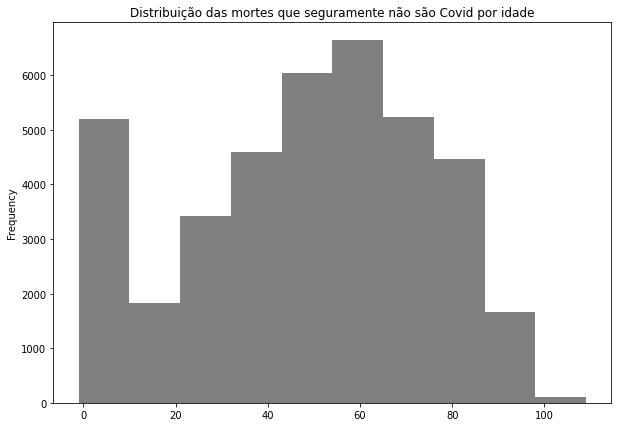

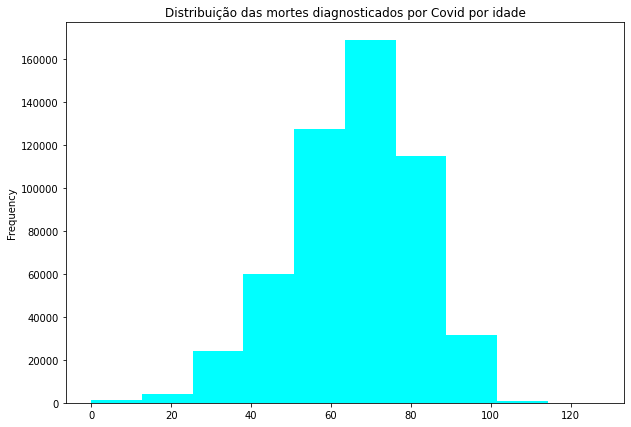

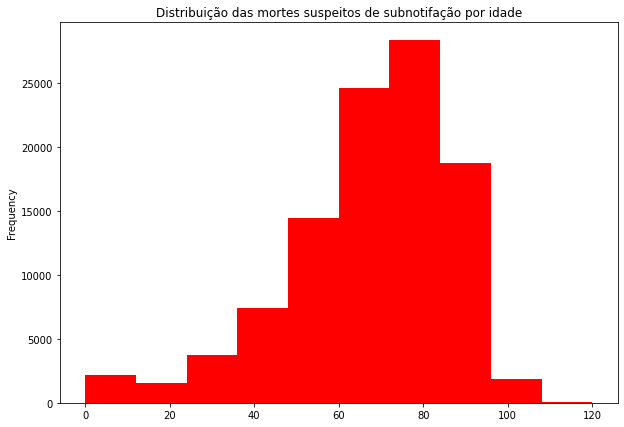

In [4]:
plt.title("Distribuição dos casos que seguramente não são Covid por idade")
non_covid_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='black')
plt.show()

plt.title("Distribuição dos casos diagnosticados por Covid por idade")
true_covid_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='yellow')
plt.show()

plt.title("Distribuição dos casos suspeitos de subnotifação por idade")
unknow_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='orange')
plt.show()

plt.title("Distribuição das óbitos que seguramente não são Covid por idade")
non_covid_deaths.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='grey')
plt.show()

plt.title("Distribuição das óbitos diagnosticados por Covid por idade")
true_covid_deaths.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='cyan')
plt.show()

plt.title("Distribuição das óbitos suspeitos de subnotifação por idade")
unknow_deaths.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='red')
plt.show()

## A porcentagem dos sexos dos pacientes com SRAG mudou durante o período de pandemia?
Sim. Foi observado que antes da pandemia os casos de SRAG eram mais comuns em mulheres. Após o início da pandemia, os casos se tornaram mais comuns entre os homens. Em relação às óbitos, o mesmo foi observado. Seja em casos ou em óbitos, o comportamento de casos confirmados de Covid-19 foi observada nos casos possíveis de subnotificação.

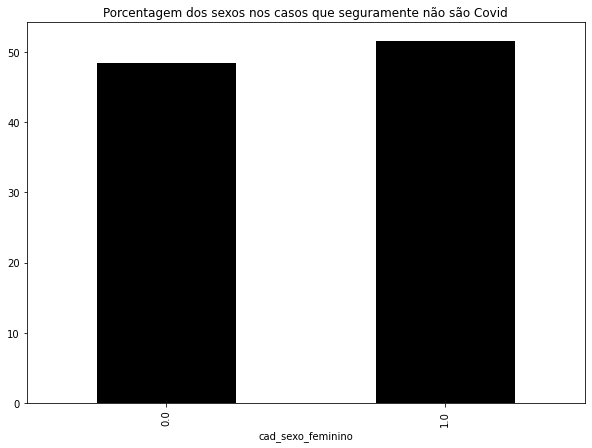

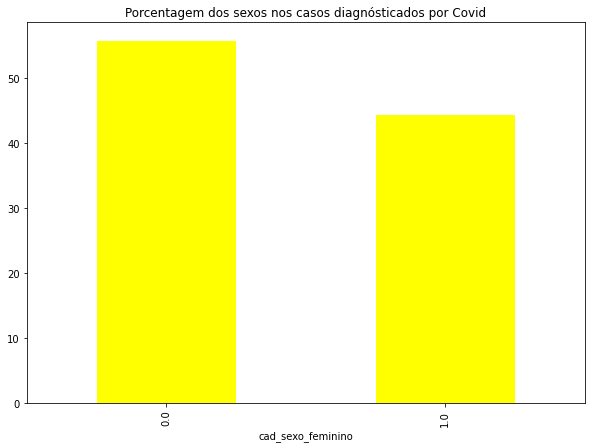

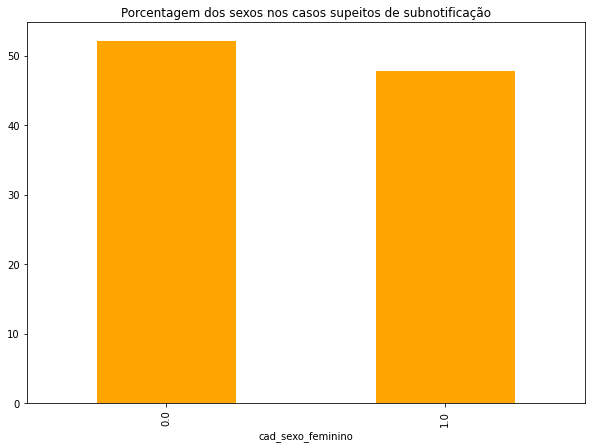

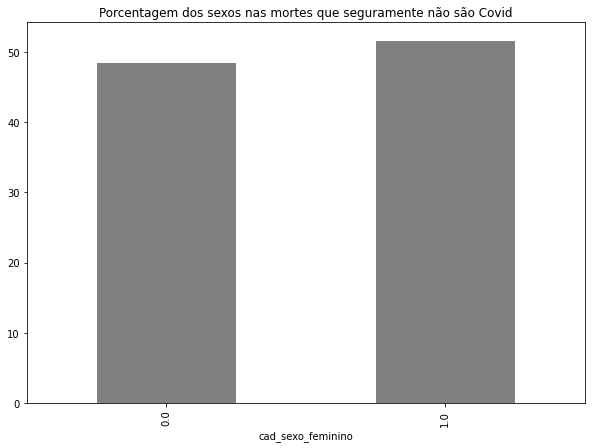

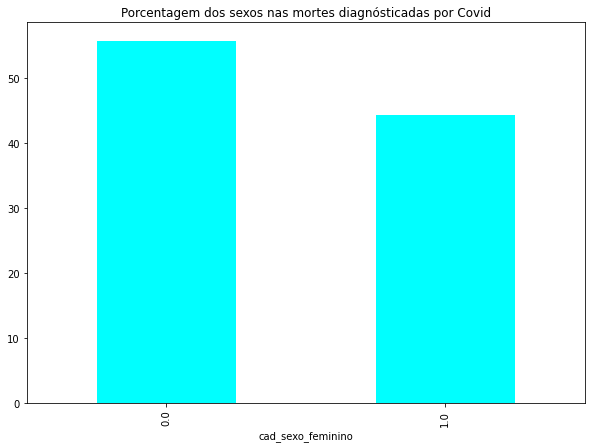

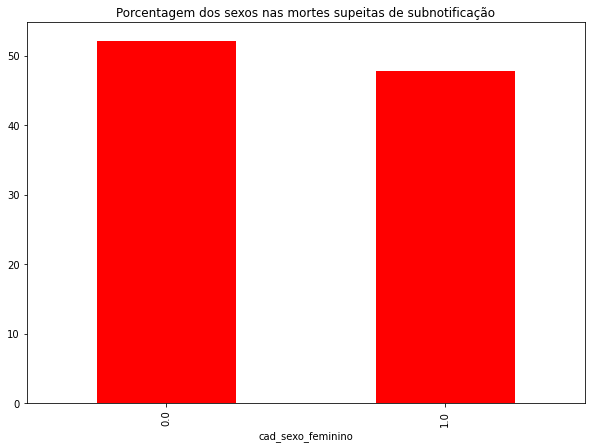

In [5]:
plt.title('Porcentagem dos sexos nos casos que seguramente não são Covid')
non_covid_cases.groupby('cad_sexo_feminino').size().divide(len(non_covid_cases.dropna(subset=['cad_sexo_feminino']))).multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title('Porcentagem dos sexos nos casos diagnósticados por Covid')
true_covid_cases.groupby('cad_sexo_feminino').size().divide(len(true_covid_cases.dropna(subset=['cad_sexo_feminino']))).multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title('Porcentagem dos sexos nos casos supeitos de subnotificação')
unknow_cases.groupby('cad_sexo_feminino').size().divide(len(unknow_cases.dropna(subset=['cad_sexo_feminino']))).multiply(100).plot(kind='bar', color='orange')
plt.show()

plt.title('Porcentagem dos sexos nas óbitos que seguramente não são Covid')
non_covid_cases.groupby('cad_sexo_feminino').size().divide(len(non_covid_cases.dropna(subset=['cad_sexo_feminino']))).multiply(100).plot(kind='bar', color='grey')
plt.show()

plt.title('Porcentagem dos sexos nas óbitos diagnósticadas por Covid')
true_covid_cases.groupby('cad_sexo_feminino').size().divide(len(true_covid_cases.dropna(subset=['cad_sexo_feminino']))).multiply(100).plot(kind='bar', color='cyan')
plt.show()

plt.title('Porcentagem dos sexos nas óbitos supeitas de subnotificação')
unknow_cases.groupby('cad_sexo_feminino').size().divide(len(unknow_cases.dropna(subset=['cad_sexo_feminino']))).multiply(100).plot(kind='bar', color='red')
plt.show()

## A média de casos e óbitos por SRAG em um dado grupo de risco (exemplo: asmáticos, gestantes, puérperas...) mudou em casos e óbitos com COVID-19?

Tanto para casos e óbitos por SRAG os gráficos apontam resultados semelhantes, onde a média nos seguintes grupos de risco tiveram um aumento significativo: cardiopáticos, diabéticos e obesos. Nos grupos de risco asmáticos, imunodepressivos, neuropáticos e pneumopáticos houveram diminuição significativa na média de casos de COVID-19 confirmados quando comparados aos casos seguramente sem COVID-19. Já nos grupos de risco de doenças renal, gestantes, hematológicos, hepáticos, puérperas e pessoas com síndrome de down não houveram diferenças significativas.

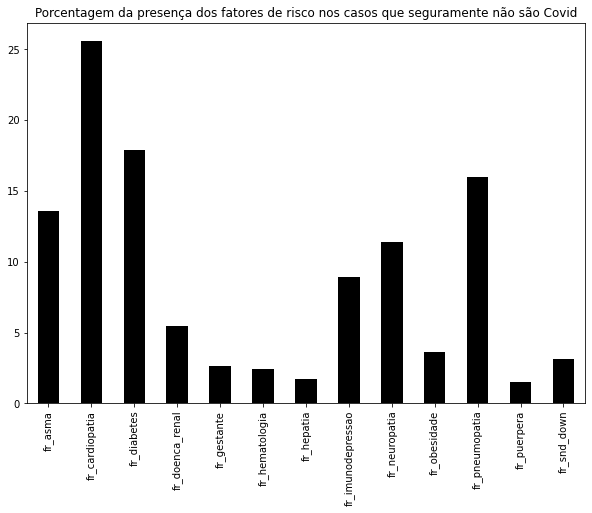

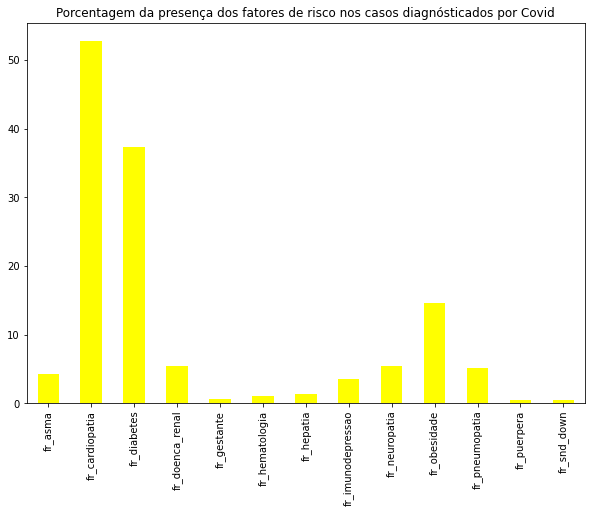

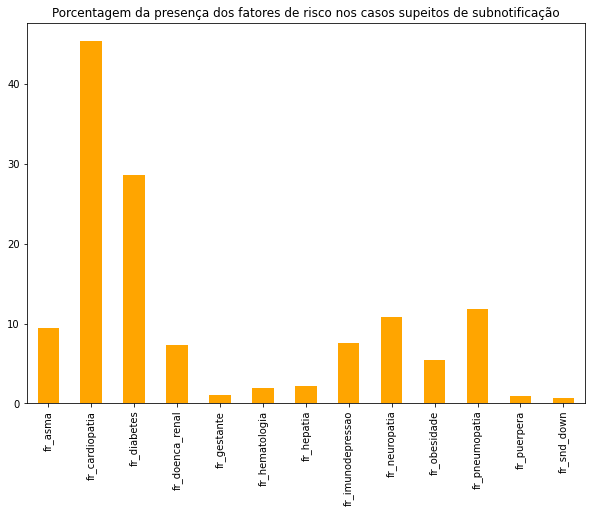

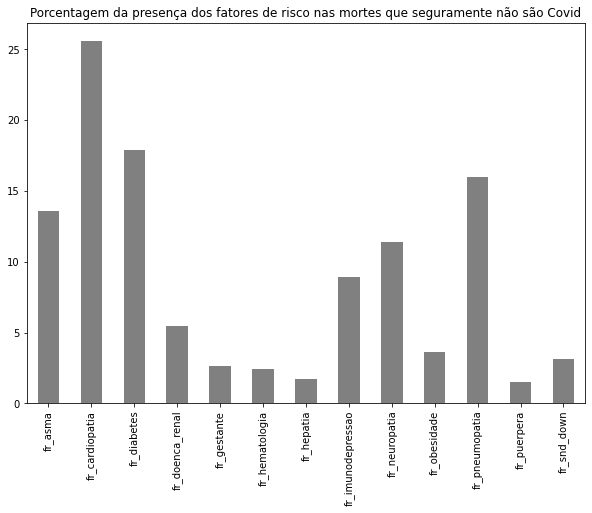

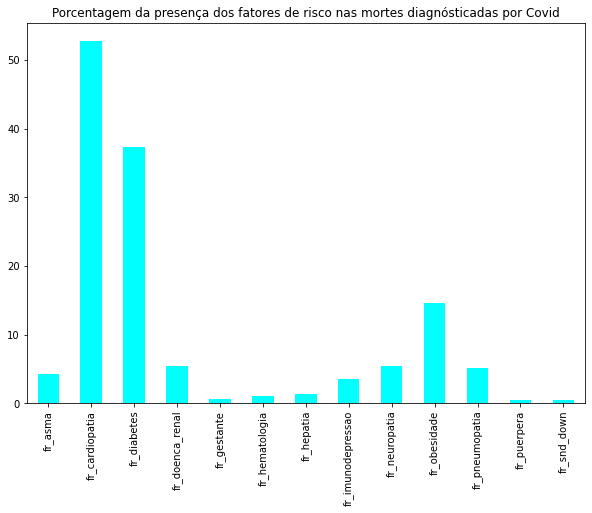

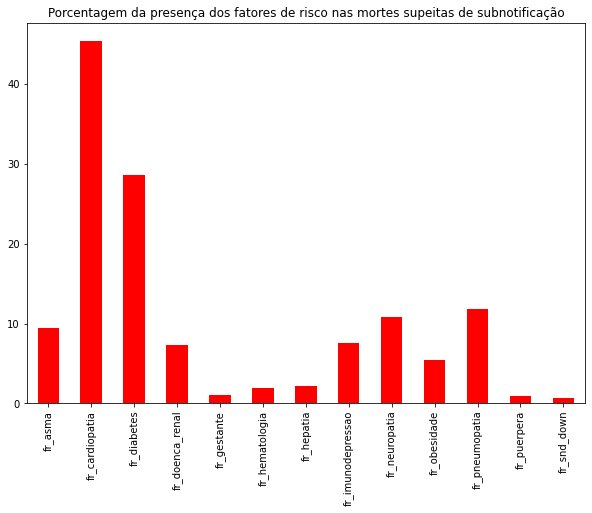

In [6]:
plt.title('Porcentagem da presença dos fatores de risco nos casos que seguramente não são Covid')
non_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title('Porcentagem da presença dos fatores de risco nos casos diagnósticados por Covid')
true_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title('Porcentagem da presença dos fatores de risco nos casos supeitos de subnotificação')
unknow_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='orange')
plt.show()

plt.title('Porcentagem da presença dos fatores de risco nas óbitos que seguramente não são Covid')
non_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='grey')
plt.show()

plt.title('Porcentagem da presença dos fatores de risco nas óbitos diagnósticadas por Covid')
true_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='cyan')
plt.show()

plt.title('Porcentagem da presença dos fatores de risco nas óbitos supeitas de subnotificação')
unknow_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='red')
plt.show()

## Qual é o conjunto de sintomas dos pacientes de antes e durante a pandemia?
Os sintomas dos pacientes de SRAG antes e durante a pandemia são dificuldade respiratória, diarreia, dispneia, dor abdominal, dor de garganta, fadiga, febre, perda do olfato, perda do paladar, saturação, tosse e vômito.

## A porcentagem de pacientes com os sintomas comuns de SRAG mudou durante o período de pandemia?
Nos sintomas dificuldade respiratória, diarreia, dispneia, dor de garganta, fadiga, febre, perda do olfato e do paladar, saturação e tosse houveram aumento no percentual. No sintoma vômito houve diminuição no percentual. Por fim, apenas o sintoma dor abdominal não apresentou diferença significativa.


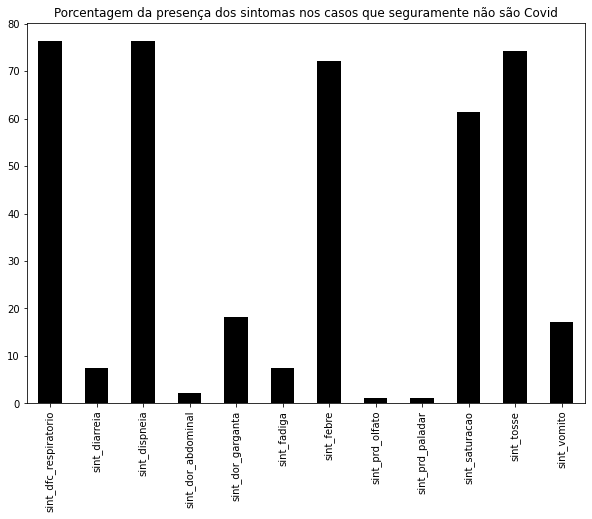

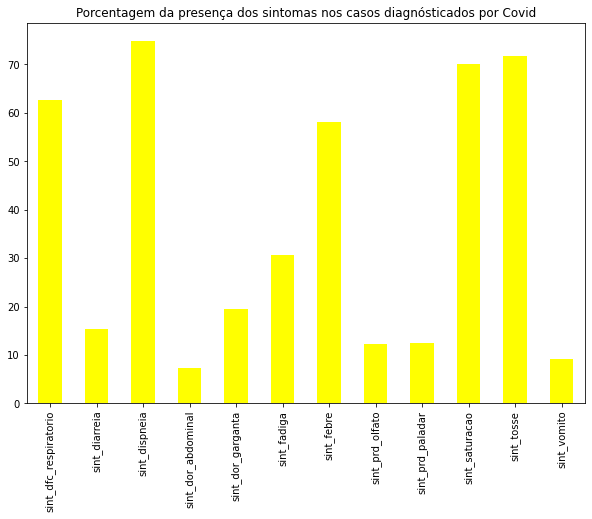

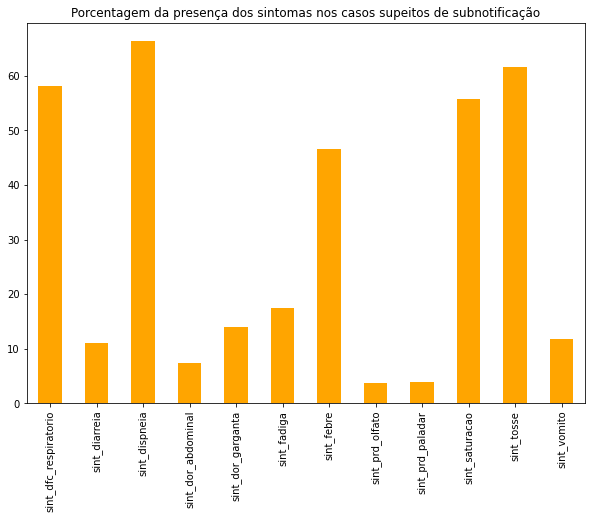

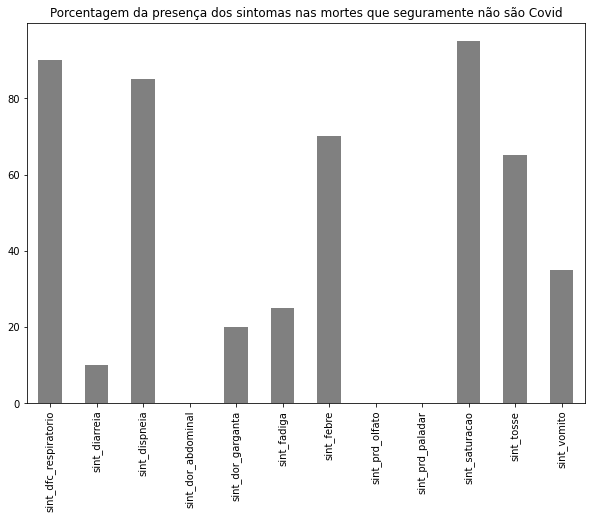

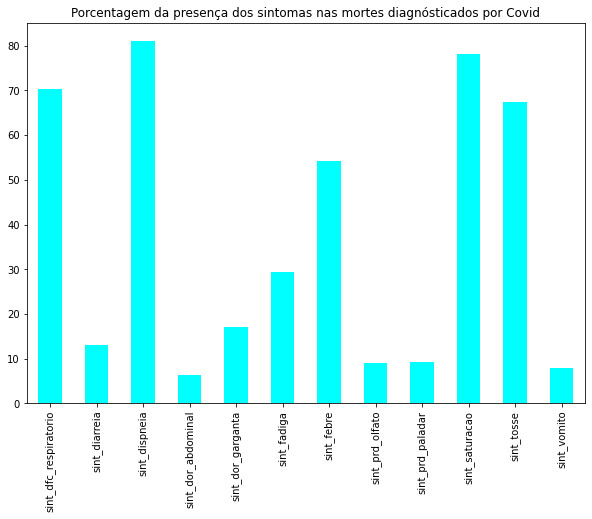

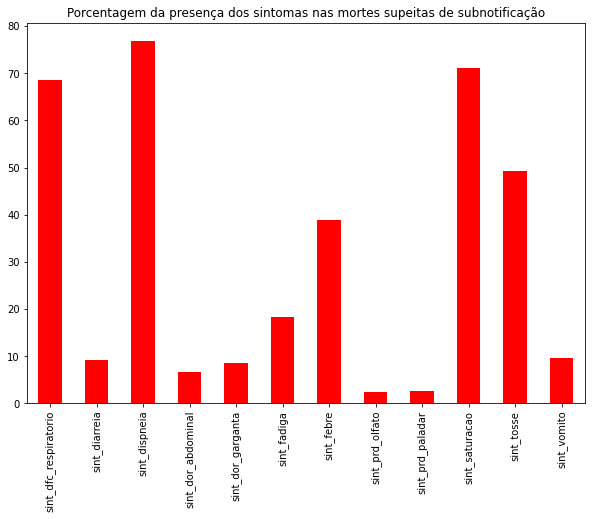

In [7]:
plt.title('Porcentagem da presença dos sintomas nos casos que seguramente não são Covid')
non_covid_cases[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title('Porcentagem da presença dos sintomas nos casos diagnósticados por Covid')
true_covid_cases[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title('Porcentagem da presença dos sintomas nos casos supeitos de subnotificação')
unknow_cases[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='orange')
plt.show()

plt.title('Porcentagem da presença dos sintomas nas óbitos que seguramente não são Covid')
non_covid_deaths[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='grey')
plt.show()

plt.title('Porcentagem da presença dos sintomas nas óbitos diagnósticados por Covid')
true_covid_deaths[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='cyan')
plt.show()

plt.title('Porcentagem da presença dos sintomas nas óbitos supeitas de subnotificação')
unknow_deaths[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='red')
plt.show()

## Qual a porcentagem de internações em leito comum por casos de SRAG antes e durante o período de pandemia?

A porcentagem de internações no período de pré-pandemia de pessoas é de aproximadamente 75%, e durante a pandemia este valor subiu para 95%. Curiosamente, os casos possíveis de subnotificação apresentam uma taxa de internação de 90%, o que indica sim possbilidade de subnotificação.

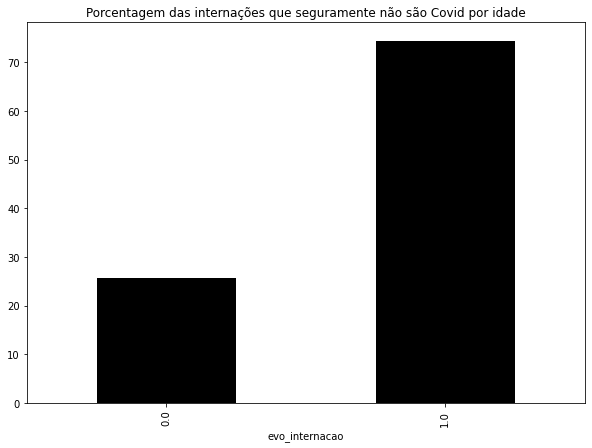

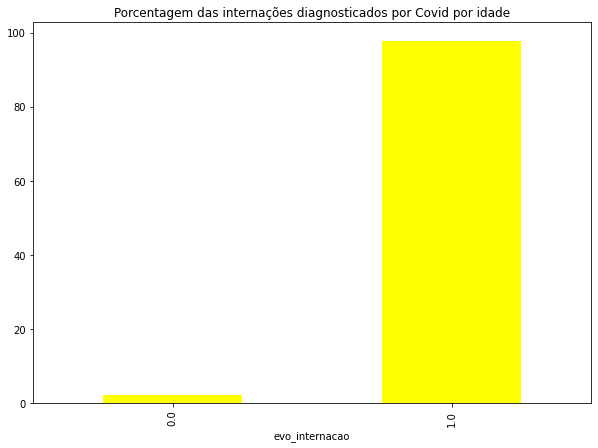

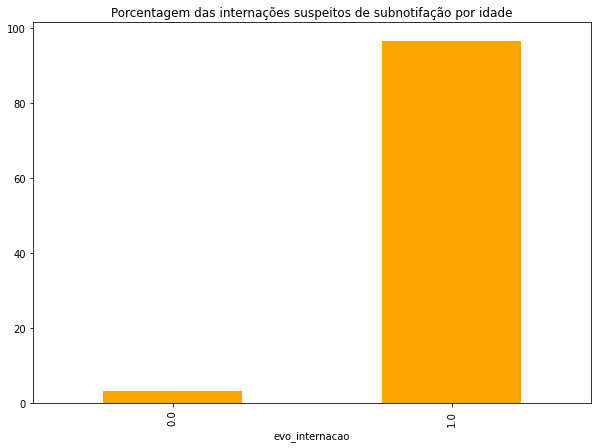

In [8]:
plt.title("Porcentagem das internações que seguramente não são Covid por idade")
non_covid_cases.groupby('evo_internacao').size().divide(len(non_covid_cases.dropna(subset=['evo_internacao']))).multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title("Porcentagem das internações diagnosticados por Covid por idade")
true_covid_cases.groupby('evo_internacao').size().divide(len(true_covid_cases.dropna(subset=['evo_internacao']))).multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title("Porcentagem das internações suspeitos de subnotifação por idade")
unknow_cases.groupby('evo_internacao').size().divide(len(unknow_cases.dropna(subset=['evo_internacao']))).multiply(100).plot(kind='bar', color='orange')
plt.show()

## Qual a porcentagem de internações em UTI por casos de SRAG antes e durante o período de pandemia?
A porcentagem de internações em UTI se manteve próxima de 35% em todos os casos.

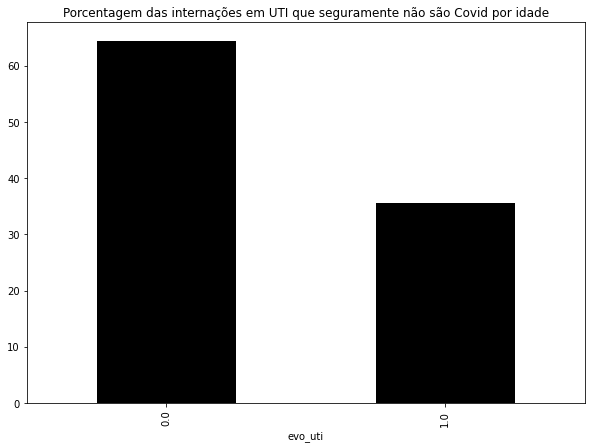

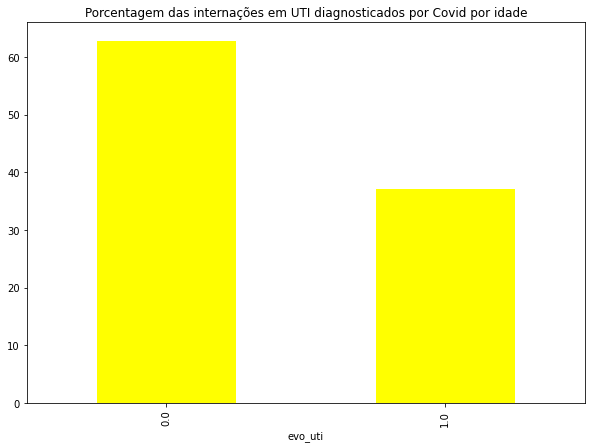

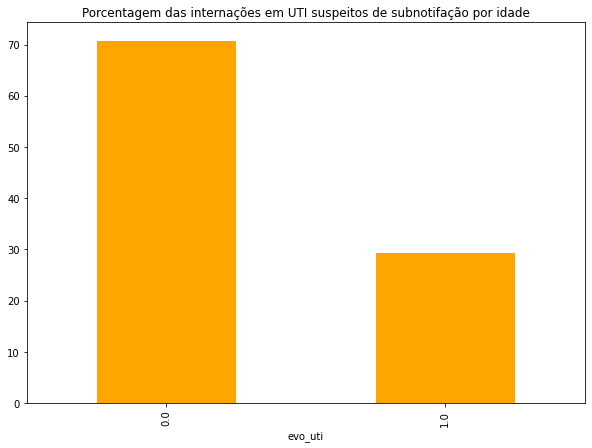

In [9]:
plt.title("Porcentagem das internações em UTI que seguramente não são Covid por idade")
non_covid_cases.groupby('evo_uti').size().divide(len(non_covid_cases.dropna(subset=['evo_uti']))).multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title("Porcentagem das internações em UTI diagnosticados por Covid por idade")
true_covid_cases.groupby('evo_uti').size().divide(len(true_covid_cases.dropna(subset=['evo_uti']))).multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title("Porcentagem das internações em UTI suspeitos de subnotifação por idade")
unknow_cases.groupby('evo_uti').size().divide(len(unknow_cases.dropna(subset=['evo_uti']))).multiply(100).plot(kind='bar', color='orange')
plt.show()

## Qual a porcentagem de uso de ventilação mecânica (respirador) por casos de SRAG antes e durante o período de pandemia?

Antes da pandemia, o uso de respirador era de aproximadamente 65%, e durante a pandemia ele chegou a quase 80%. Quanto aos casos possíveis de subnotificação, este valor flutuou entre 65%, sendo o primeiro indício contra a hipótese de subnotificações.

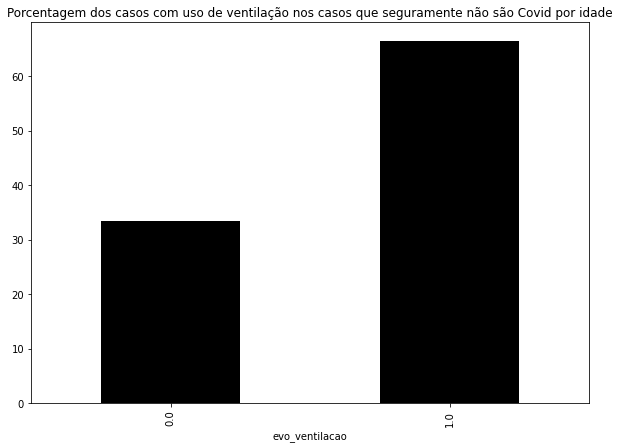

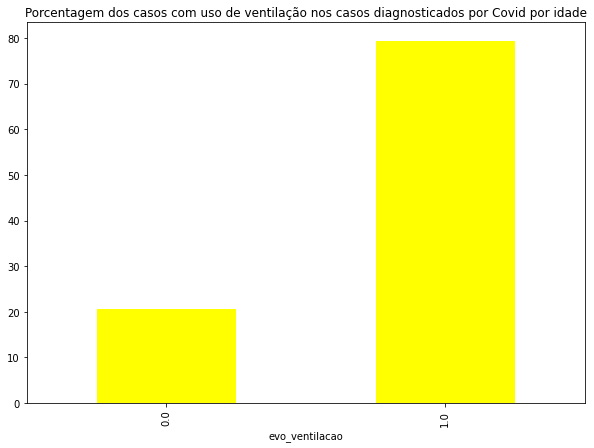

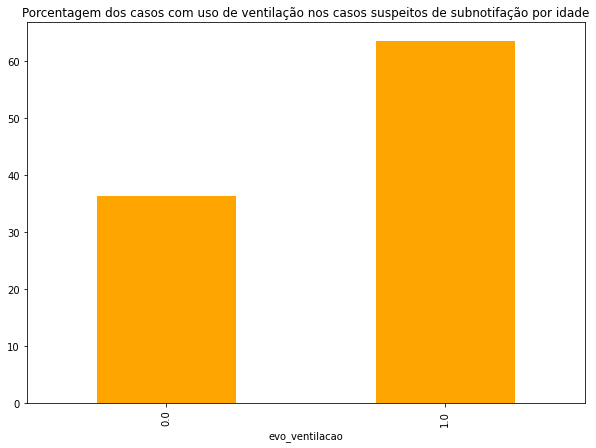

In [10]:
plt.title("Porcentagem dos casos com uso de ventilação nos casos que seguramente não são Covid por idade")
non_covid_cases.groupby('evo_ventilacao').size().divide(len(non_covid_cases.dropna(subset=['evo_ventilacao']))).multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title("Porcentagem dos casos com uso de ventilação nos casos diagnosticados por Covid por idade")
true_covid_cases.groupby('evo_ventilacao').size().divide(len(true_covid_cases.dropna(subset=['evo_ventilacao']))).multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title("Porcentagem dos casos com uso de ventilação nos casos suspeitos de subnotifação por idade")
unknow_cases.groupby('evo_ventilacao').size().divide(len(unknow_cases.dropna(subset=['evo_ventilacao']))).multiply(100).plot(kind='bar', color='orange')
plt.show()

## Qual a letalidade média dos casos de SRAG antes e durante a pandemia?

Antes da pandemia, a letalidade não passava dos 10%. Durante a pandemia, esse valor chegou a aproximadamente 35%. No casos possíveis de subnotificação, este valor esteve em cerca de pouco mais de 20%, indicando sim possibilidade de subnotificação.

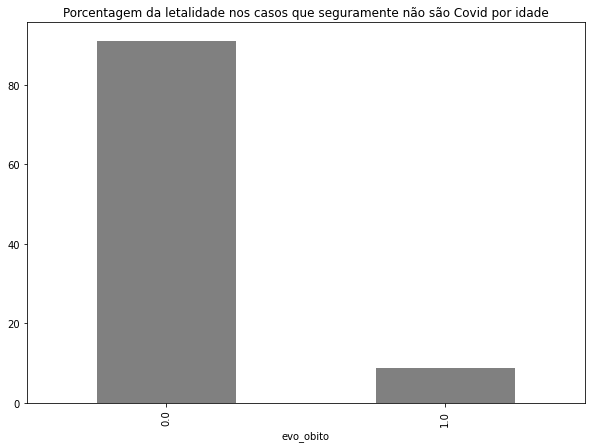

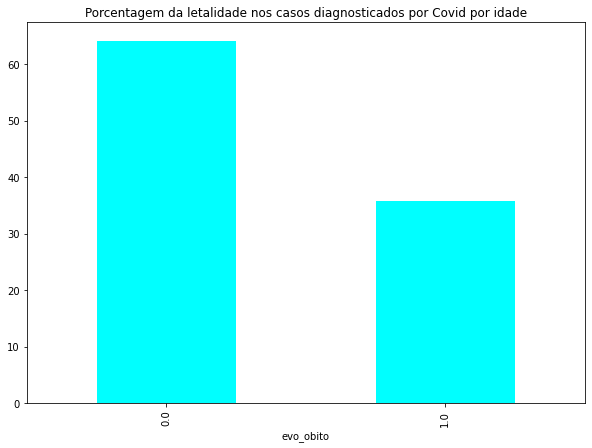

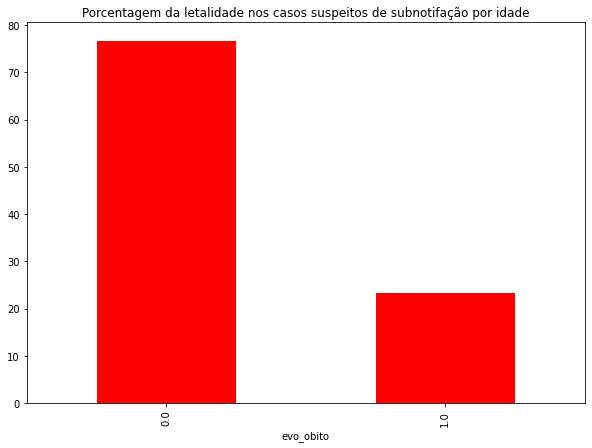

In [11]:
plt.title("Porcentagem da letalidade nos casos que seguramente não são Covid por idade")
non_covid_cases.groupby('evo_obito').size().divide(len(non_covid_cases.dropna(subset=['evo_obito']))).multiply(100).plot(kind='bar', color='grey')
plt.show()

plt.title("Porcentagem da letalidade nos casos diagnosticados por Covid por idade")
true_covid_cases.groupby('evo_obito').size().divide(len(true_covid_cases.dropna(subset=['evo_obito']))).multiply(100).plot(kind='bar', color='cyan')
plt.show()

plt.title("Porcentagem da letalidade nos casos suspeitos de subnotifação por idade")
unknow_cases.groupby('evo_obito').size().divide(len(unknow_cases.dropna(subset=['evo_obito']))).multiply(100).plot(kind='bar', color='red')
plt.show()

## Houveram diferenças geográficas visíveis nos casos de antes e de durante o período de pandemia?
Sim. O sul do Brasil foi mais afetado do que o sudeste na pré-pandemia, enquanto durante o período da pandemia o sudeste foi mais afetado que o sul, além de ter sido a região do Brasil mais afetada. O comportamento de durante a pandemia também foi observado nos casos possíveis de subnotificação. O mesmo pode ser observado para o número de óbitos.

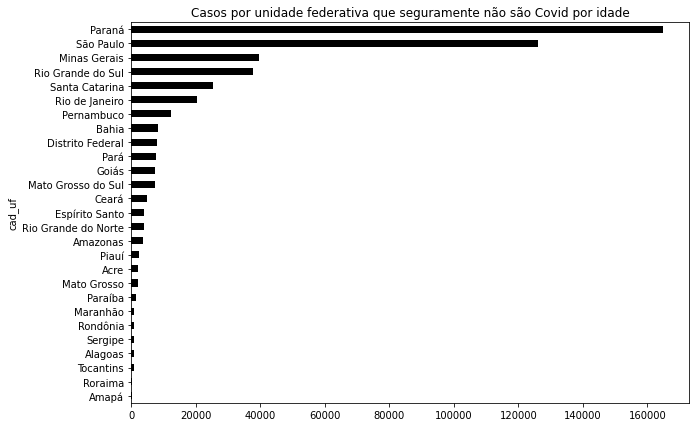

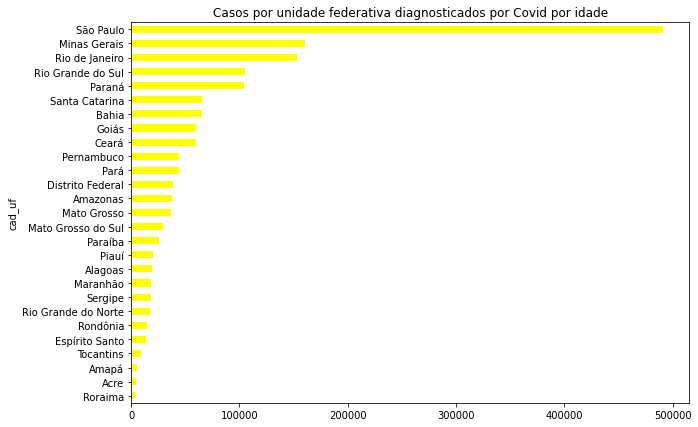

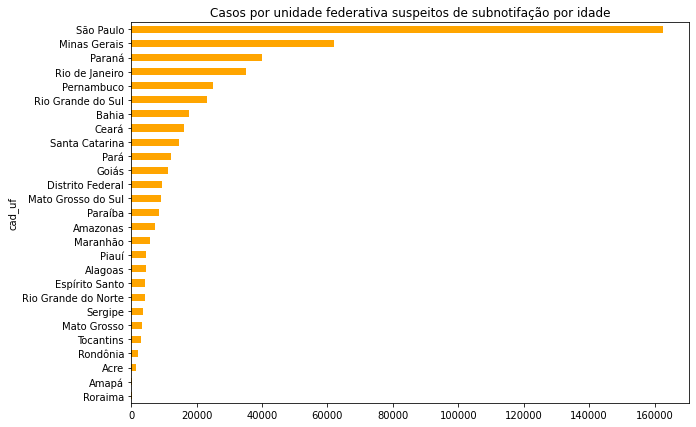

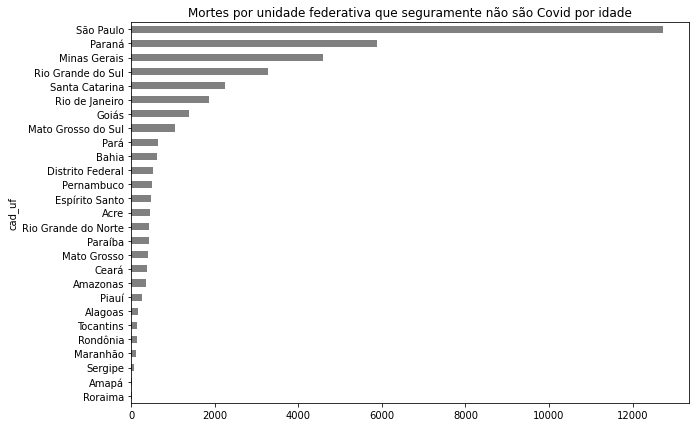

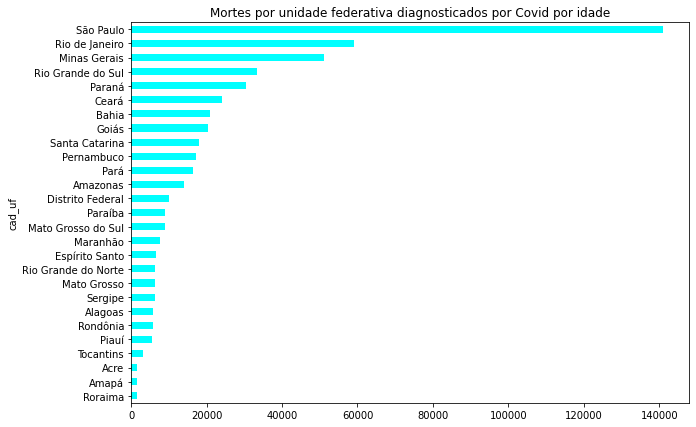

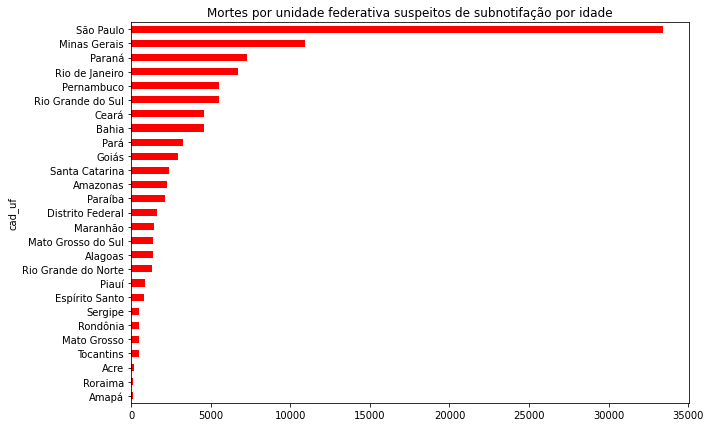

In [12]:
plt.title("Casos por unidade federativa que seguramente não são Covid por idade")
non_covid_cases.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='black')
plt.show()

plt.title("Casos por unidade federativa diagnosticados por Covid por idade")
true_covid_cases.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='yellow')
plt.show()

plt.title("Casos por unidade federativa suspeitos de subnotifação por idade")
unknow_cases.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='orange')
plt.show()

plt.title("óbitos por unidade federativa que seguramente não são Covid por idade")
non_covid_deaths.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='grey')
plt.show()

plt.title("óbitos por unidade federativa diagnosticados por Covid por idade")
true_covid_deaths.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='cyan')
plt.show()

plt.title("óbitos por unidade federativa suspeitos de subnotifação por idade")
unknow_deaths.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='red')
plt.show()

## Mas então, houveram ou não subnotificações de SRAG provocada por Covid-19 no Brasil?

É difícil saber, embora há fortes indícios de que sim. Analisando todas as respostas geral, apenas uma aparenta indicar que não aconteceram subnotificações, que foi o indicador de uso de ventilação mecânica (respirador). Entretanto, é bastante importante usar nosso conhecimento de mundo de que muitos brasileiros não puderam usar tal aparelhagem, visto falta de oxigênio ou do próprio aparelho, como pode ser observado em diferentes notícias.

- https://g1.globo.com/am/amazonas/noticia/2021/02/14/crise-do-oxigenio-um-mes-apos-colapso-em-hospitais-manaus-ainda-depende-de-doacoes-do-insumo.ghtml
- https://g1.globo.com/bemestar/coronavirus/noticia/2020/05/07/apos-buscar-solucao-nacional-para-falta-de-respiradores-ministerio-recebe-so-20percent-dos-equipamentos-previstos-para-abril.ghtml
- https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/03/20/coronavirus-60-das-cidades-nao-tem-respiradores-para-enfrentar-epidemia.htm

Por outro lado, é difícil observar subnotificação considerando dados geográficos, principalmente considerando que não se sabe o quão potente é o lockdown contra outros causadores de SRAG, como a gripe, embora médicos apontem que é bastante eficaz. Assim, caso o lockdown funcione melhor para tais doenças do que o Covid-19, estaríamos apenas medindo isso ao invés de medir subnotificação.

Embora todas as dificuldades, estamos contentes com nosso resultado até aqui, e vamos ansiosos para a entrega 4! :3